In [1]:
import os
import time
import pandas as pd
import papermill as pm
import scrapbook as sb

from datetime import datetime, timedelta

D:\software\anaconda\lib\site-packages\papermill\iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem


#### get the basic information
+ start date
+ end date
+ token names

In [2]:
connection_string = 'sqlite:///data/data.db'
prices = pd.read_sql('SELECT * FROM ohlc', connection_string)
prices['ts'] = pd.to_datetime(prices['ts'])

end_date = prices['ts'].max() - timedelta(days=prices['ts'].max().weekday())  # latest Sunday before the last day in database
start_date = end_date - timedelta(days= 14)  # two complete weeks before
start_dates = [start_date + timedelta(days=7 * x) for x in range(2)]  # start dates of two weeks

tokens = prices['token'].unique().tolist()
print(f'tokens: {tokens}')

tokens: ['BTC', 'ETH', 'USDT', 'SOL', 'ADA', 'DOT', 'AVAX', 'ATOM', 'CRV', 'AAVE', 'COMP']


#### Run template notebook

In [3]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [4]:
for start_date in start_dates:
    for token in tokens:
        print(f'running for {token} for date {start_date} to {start_date + timedelta(days=7)}', end='\r')
        date = start_date.strftime('%Y-%m-%d')
        res = pm.execute_notebook(
            'market_analysis_template.ipynb',
            f'{base_output_folder}/market_analysis_{token}_{date}.ipynb',
            parameters = {
                'from_date': f'{start_date}',
                'to_date': f'{start_date + timedelta(days=7)}',
                'token': token,
                'connection_string': connection_string,
            }
        )

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

In [5]:
nbs = sb.read_notebooks('outputs')

In [6]:
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'avg_return': scrap['prices'].data['return'].mean(),
        'avg_volatility': scrap['prices'].data['volatility'].mean(),
        'max_drawdown': scrap['prices'].data['max_drawdown'].max(),
        'price_range': scrap['prices'].data['close'].iloc[-1] - scrap['prices'].data['close'].iloc[0],
        }) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,avg_return,avg_volatility,max_drawdown,price_range
0,AAVE,2021-11-29 00:00:00,2021-12-06 00:00:00,-1.305232e-03,0.221054,0.303471,-46.8080
1,AAVE,2021-12-06 00:00:00,2021-12-13 00:00:00,-3.755434e-04,0.200400,0.181226,-11.6730
2,ADA,2021-11-29 00:00:00,2021-12-06 00:00:00,-9.344545e-04,0.226749,0.250852,-0.2305
3,ADA,2021-12-06 00:00:00,2021-12-13 00:00:00,-1.302320e-04,0.203766,0.183820,-0.0297
4,ATOM,2021-11-29 00:00:00,2021-12-06 00:00:00,-6.543502e-04,0.340796,0.323731,-2.8370
5,ATOM,2021-12-06 00:00:00,2021-12-13 00:00:00,-9.716086e-07,0.254383,0.145769,-0.0040
6,AVAX,2021-11-29 00:00:00,2021-12-06 00:00:00,-1.575971e-03,0.320661,0.337174,-25.6000
7,AVAX,2021-12-06 00:00:00,2021-12-13 00:00:00,8.111556e-05,0.249173,0.171316,1.1800
8,BTC,2021-11-29 00:00:00,2021-12-06 00:00:00,-8.976678e-04,0.175543,0.213690,-7979.4100
9,BTC,2021-12-06 00:00:00,2021-12-13 00:00:00,9.997437e-05,0.134449,0.092779,833.1100


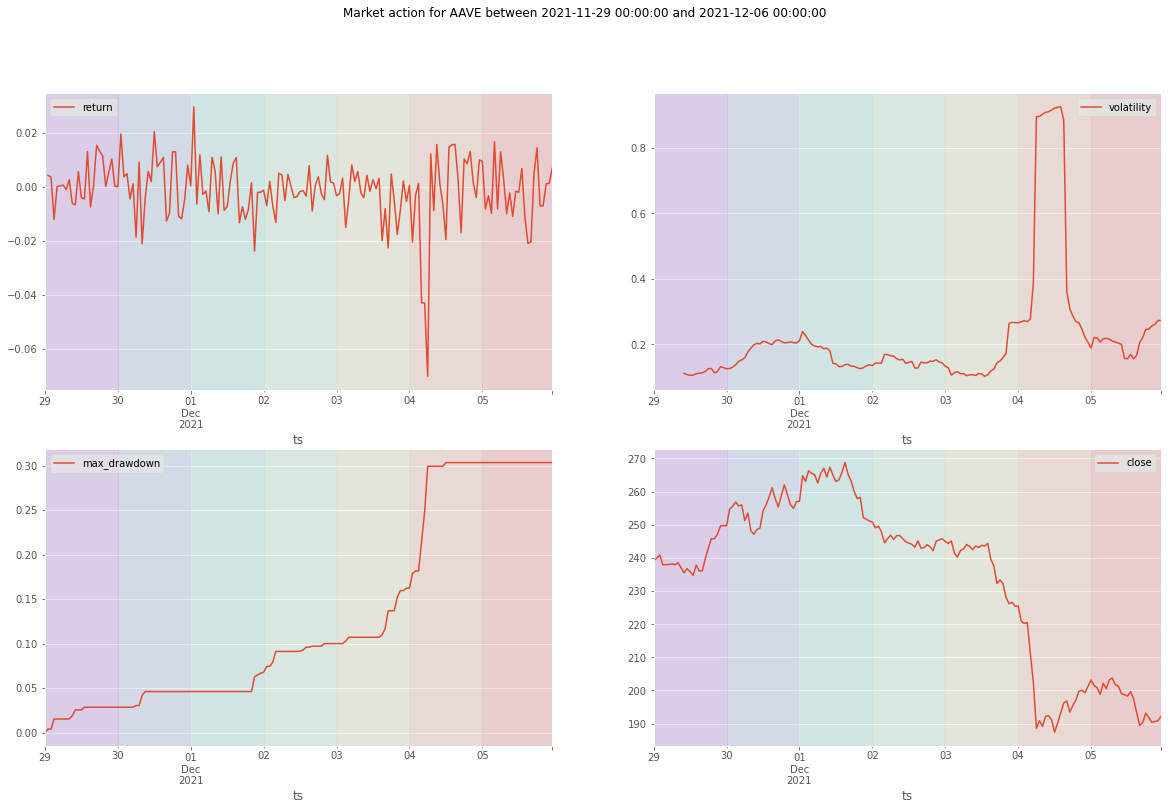

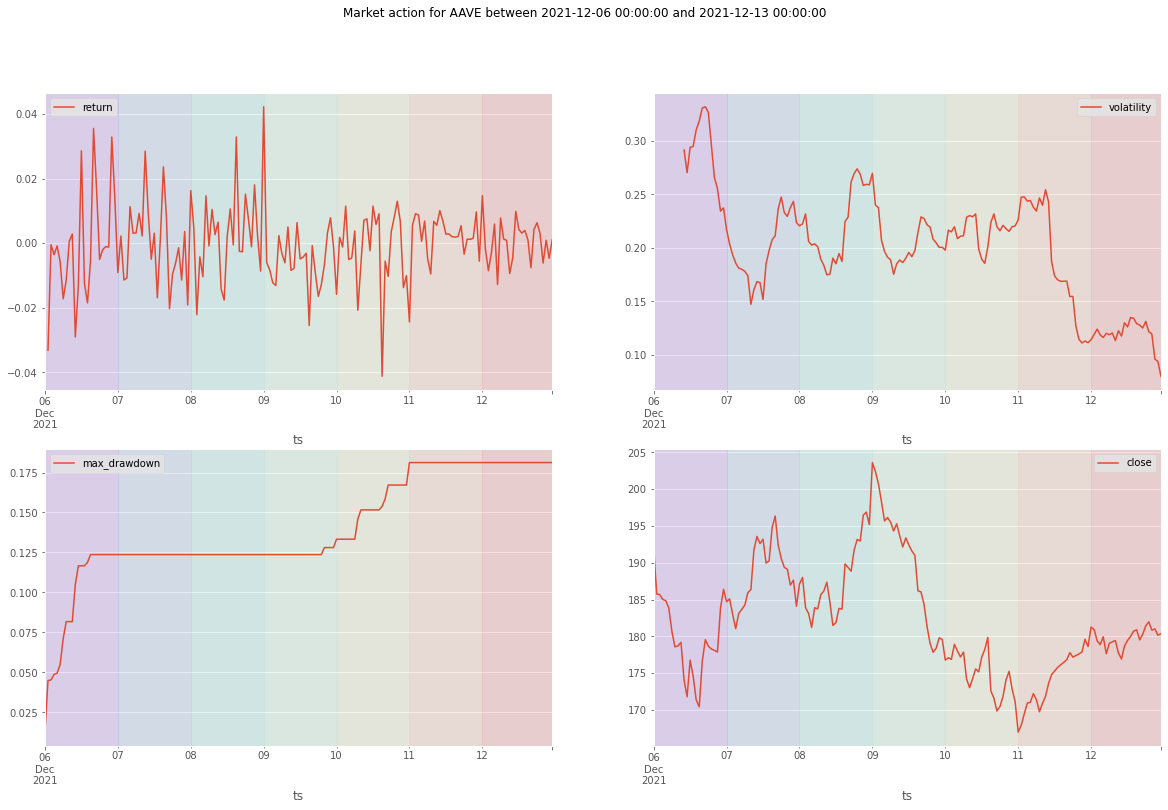

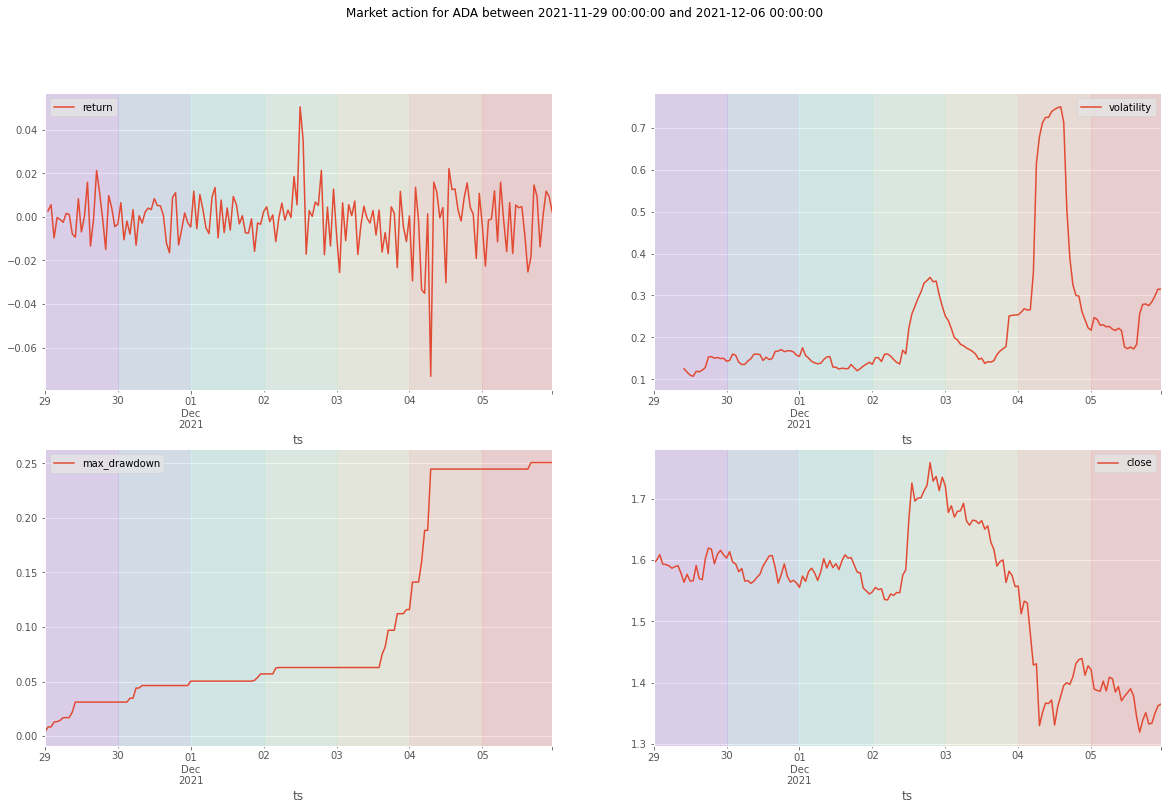

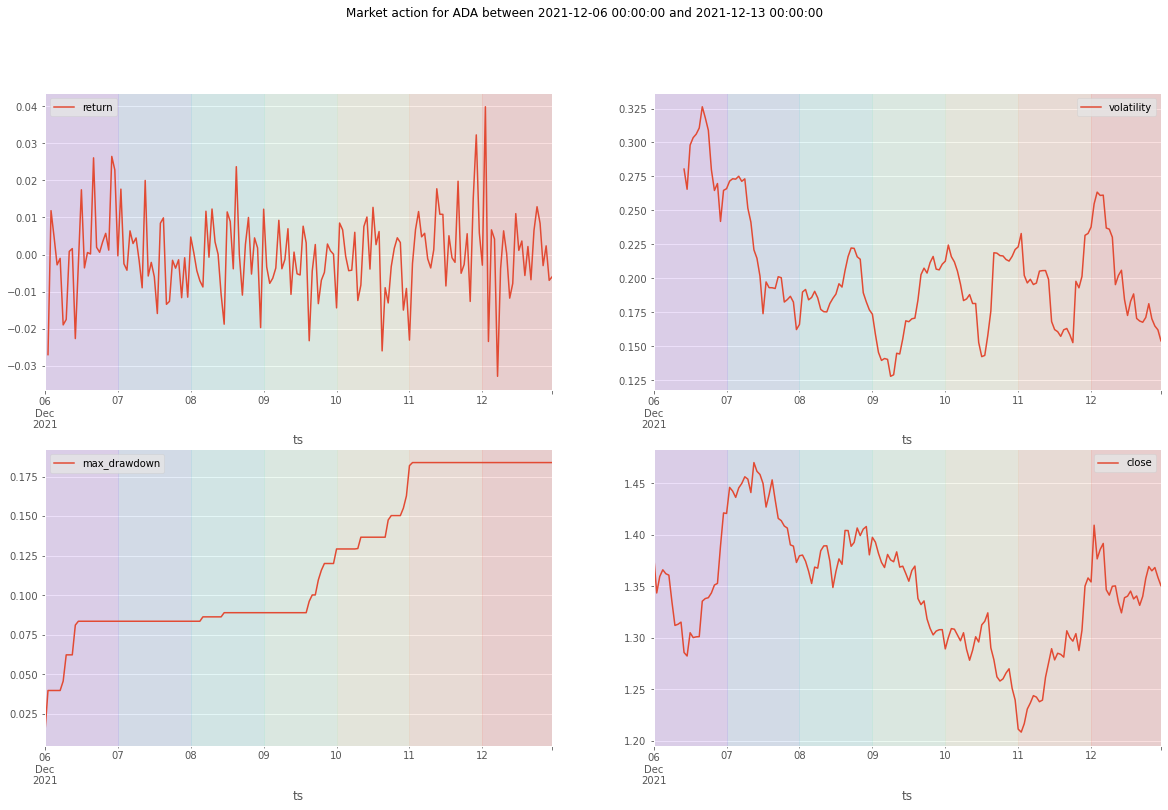

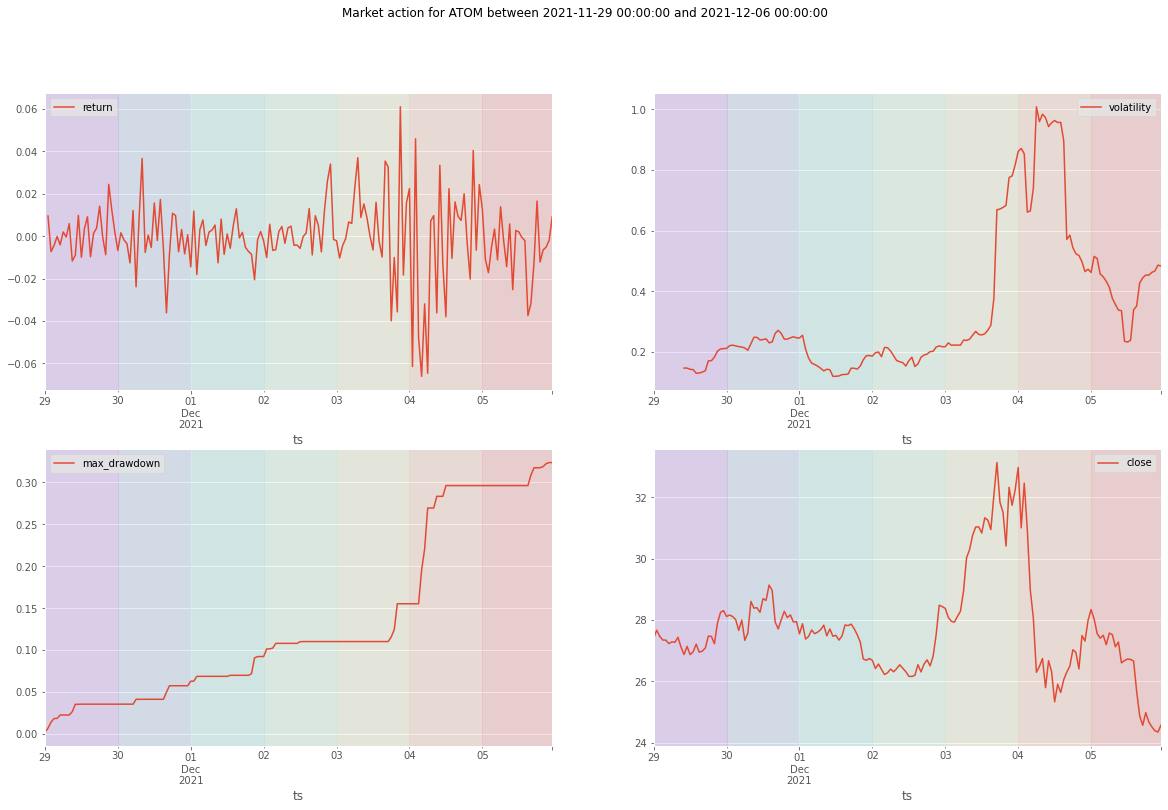

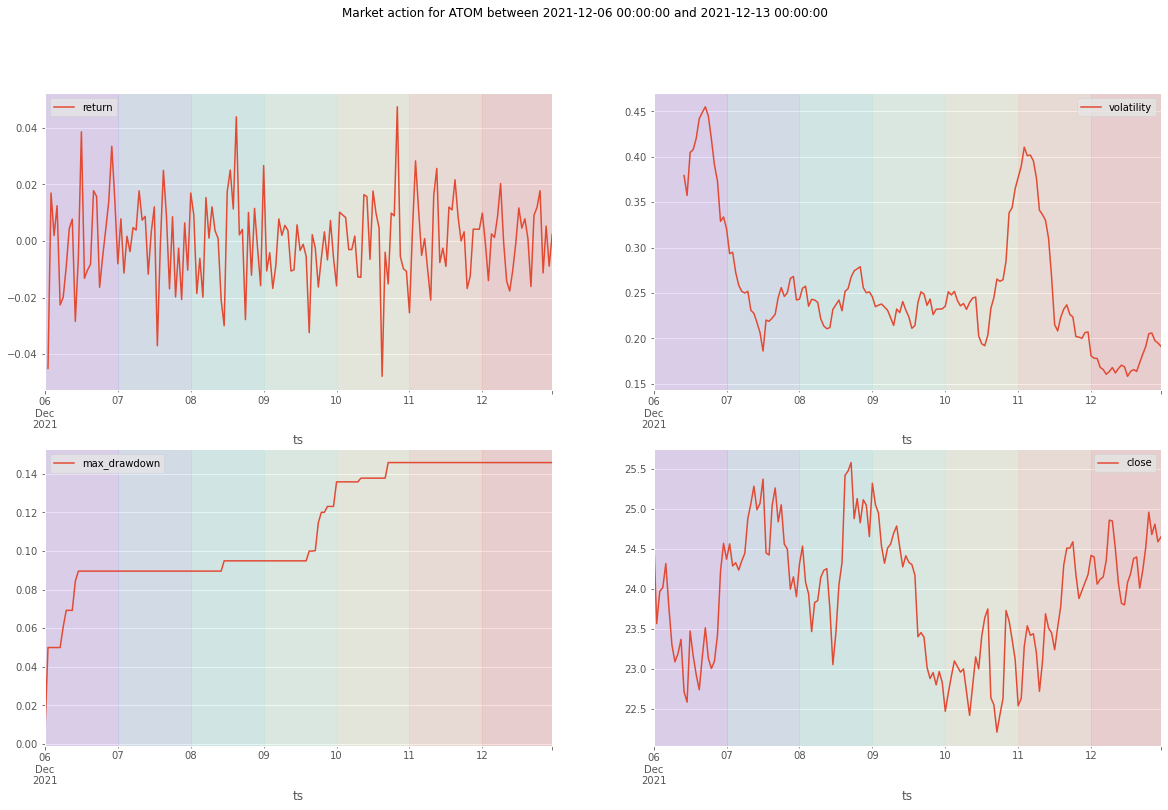

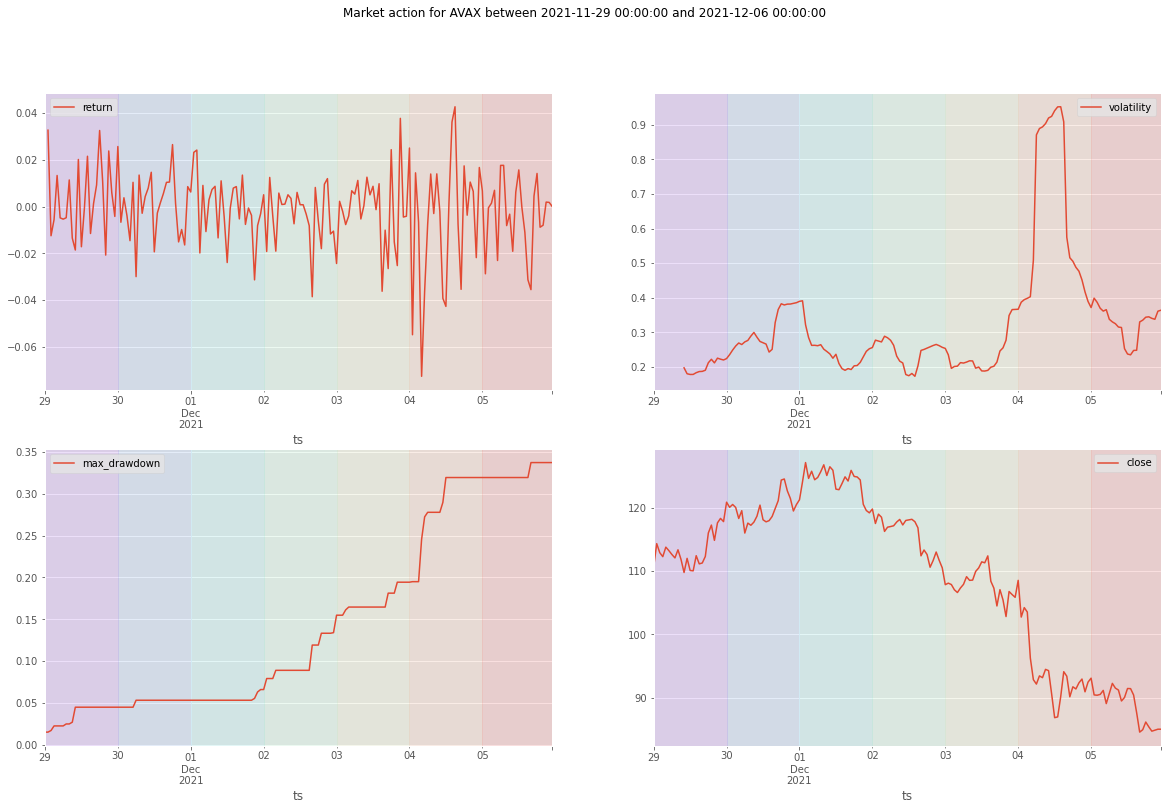

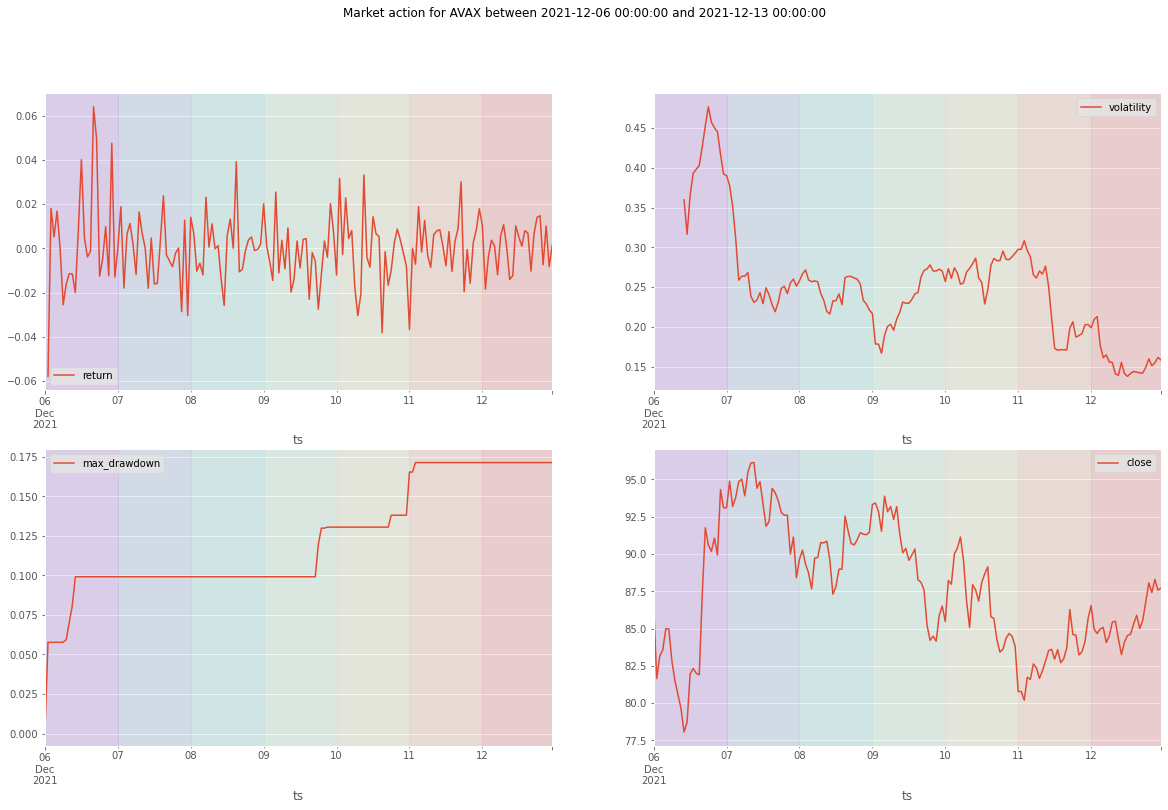

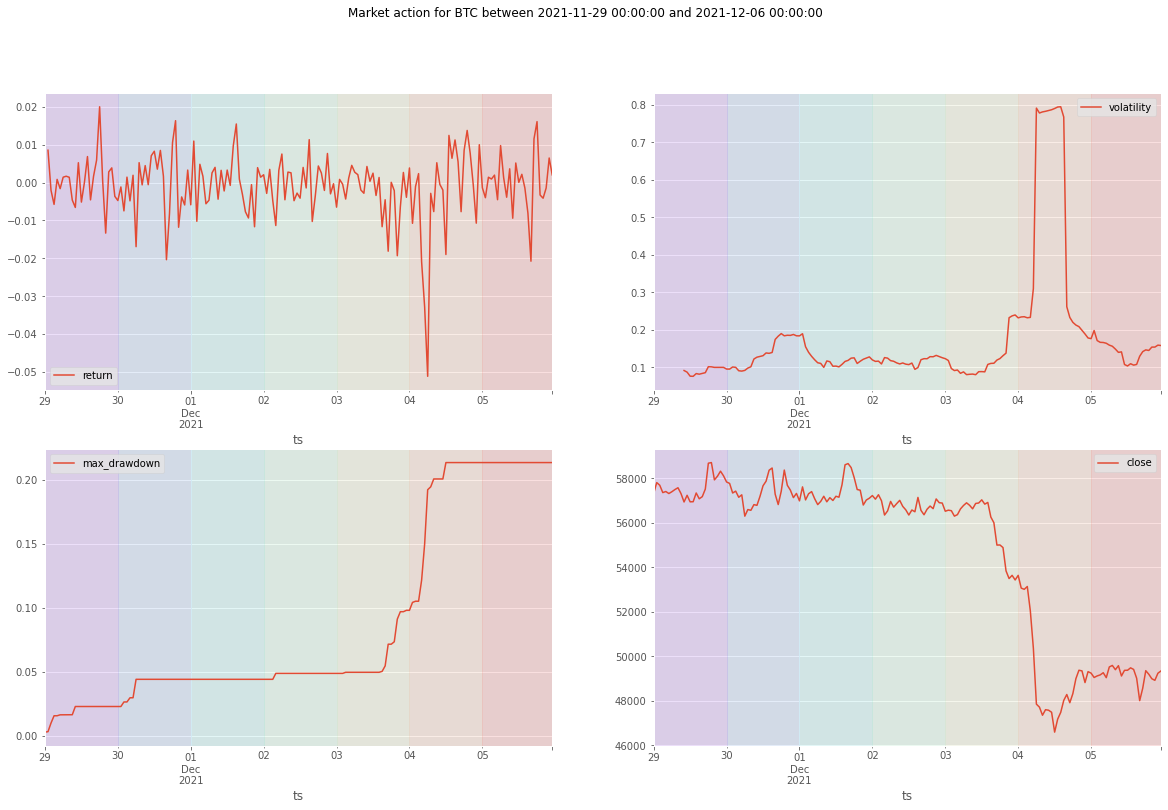

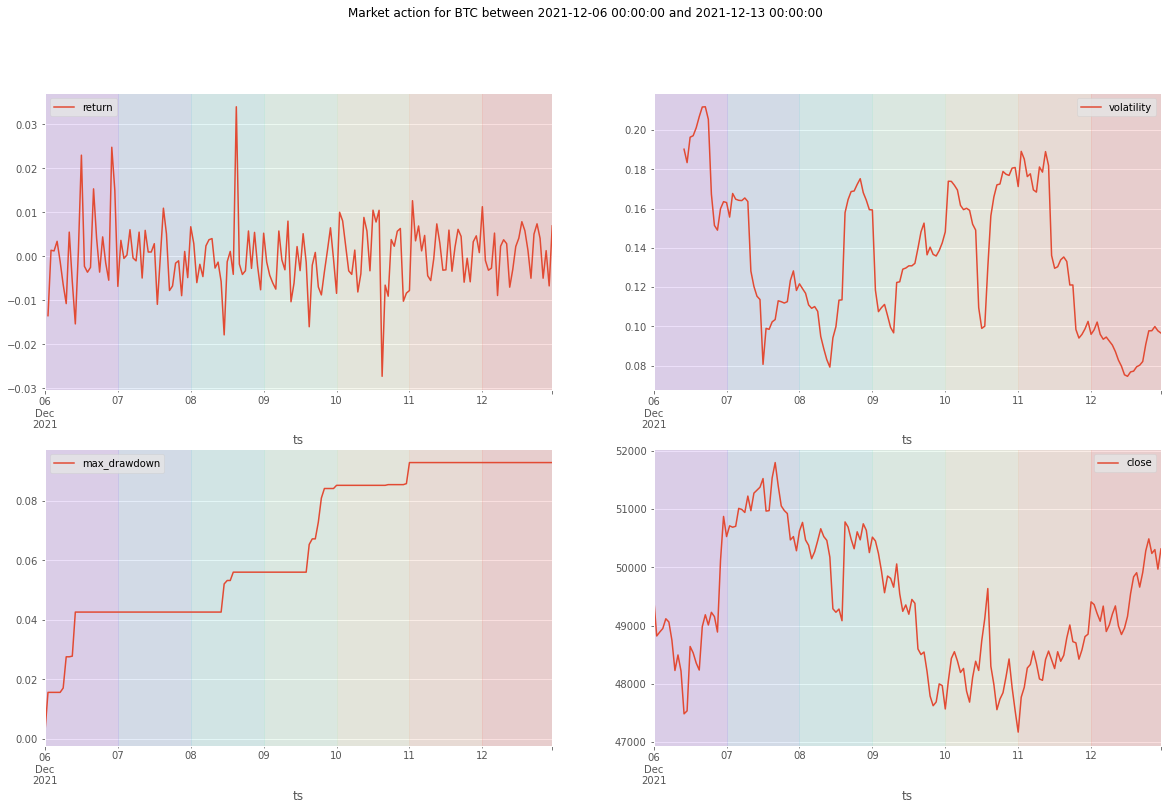

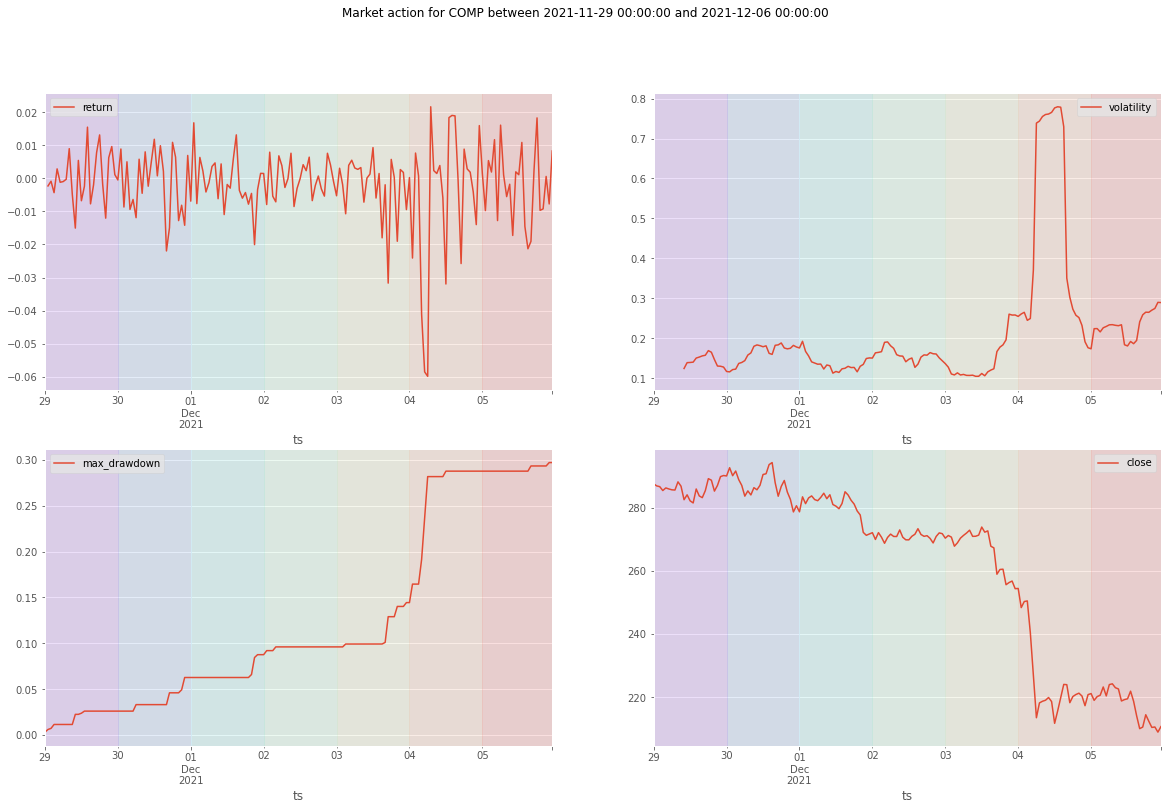

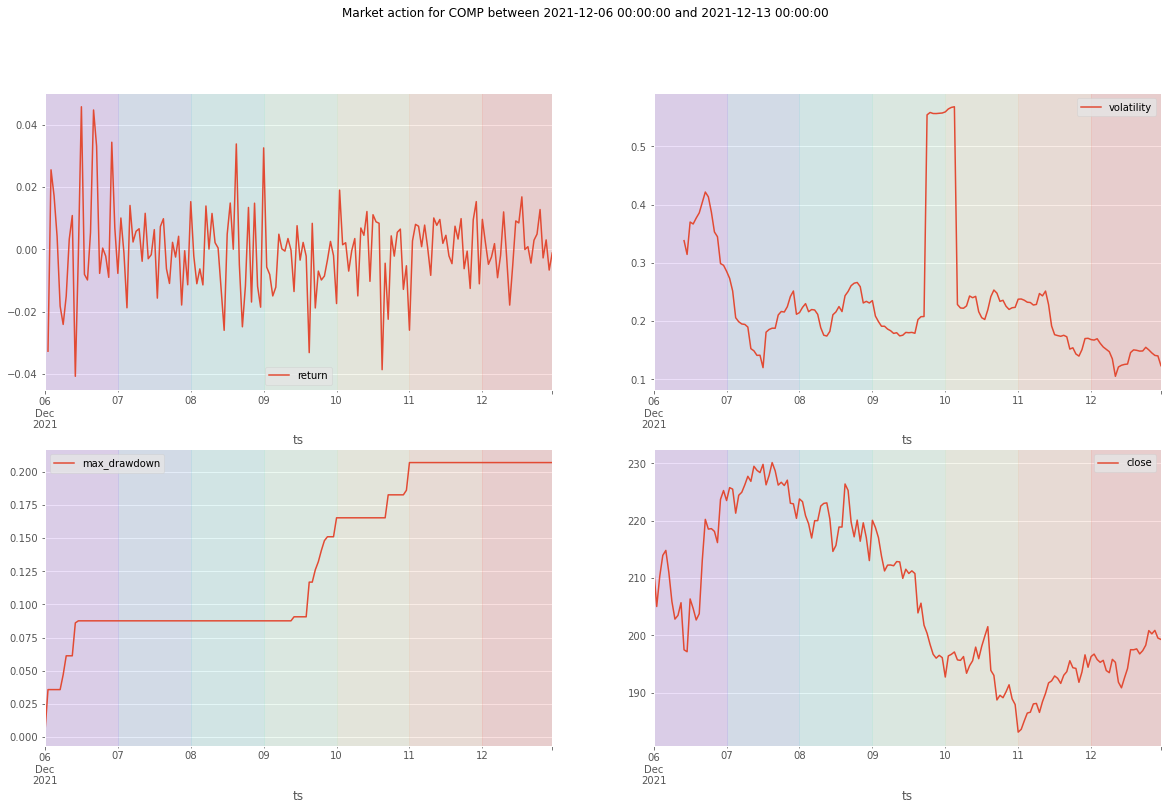

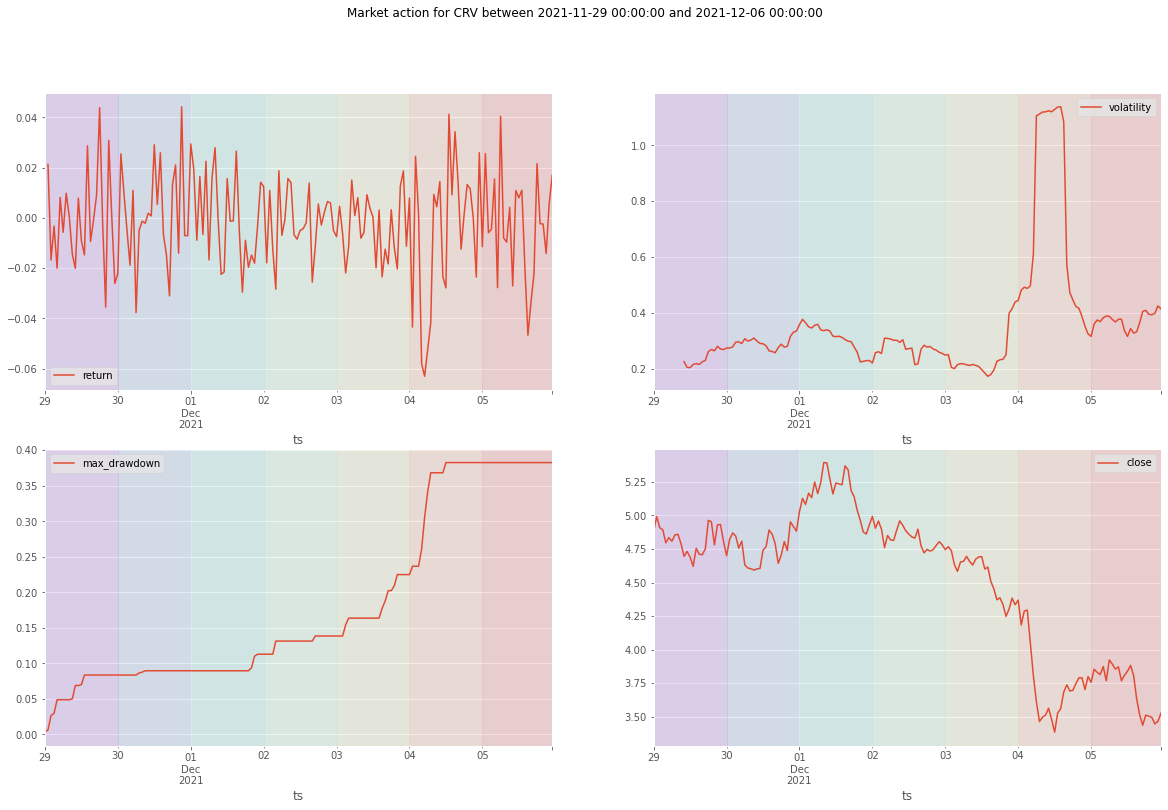

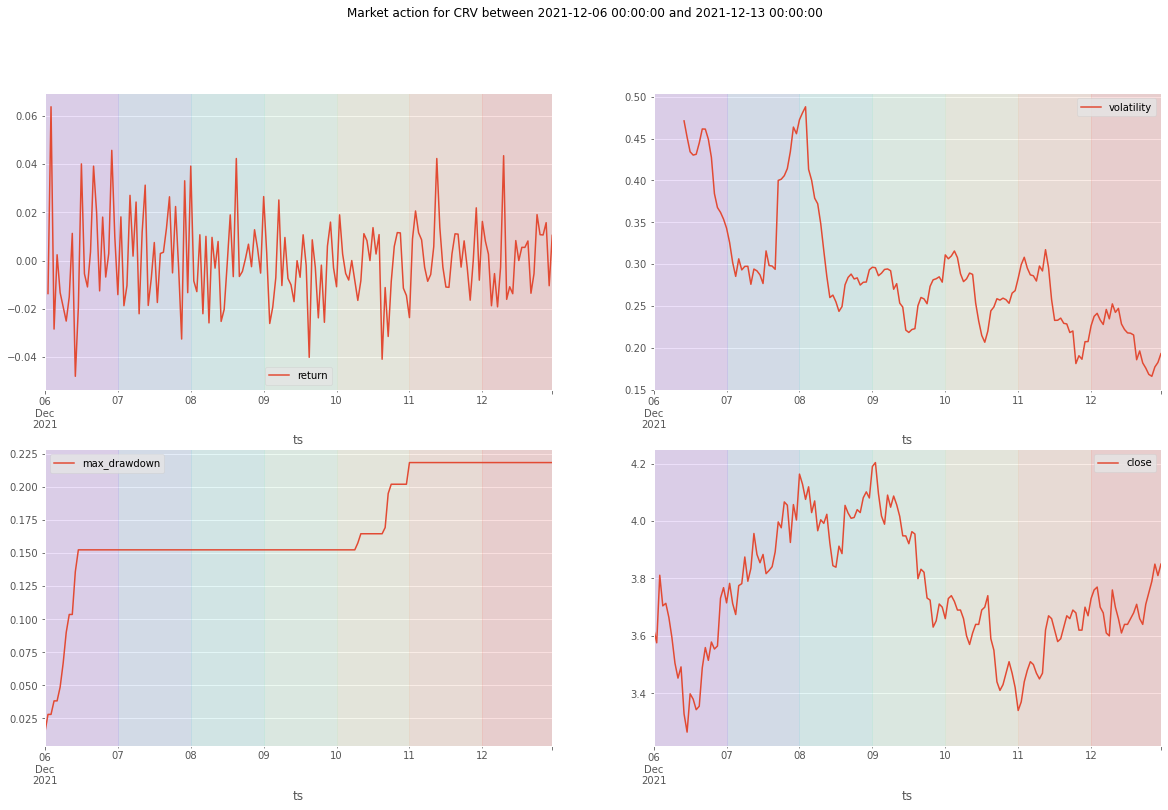

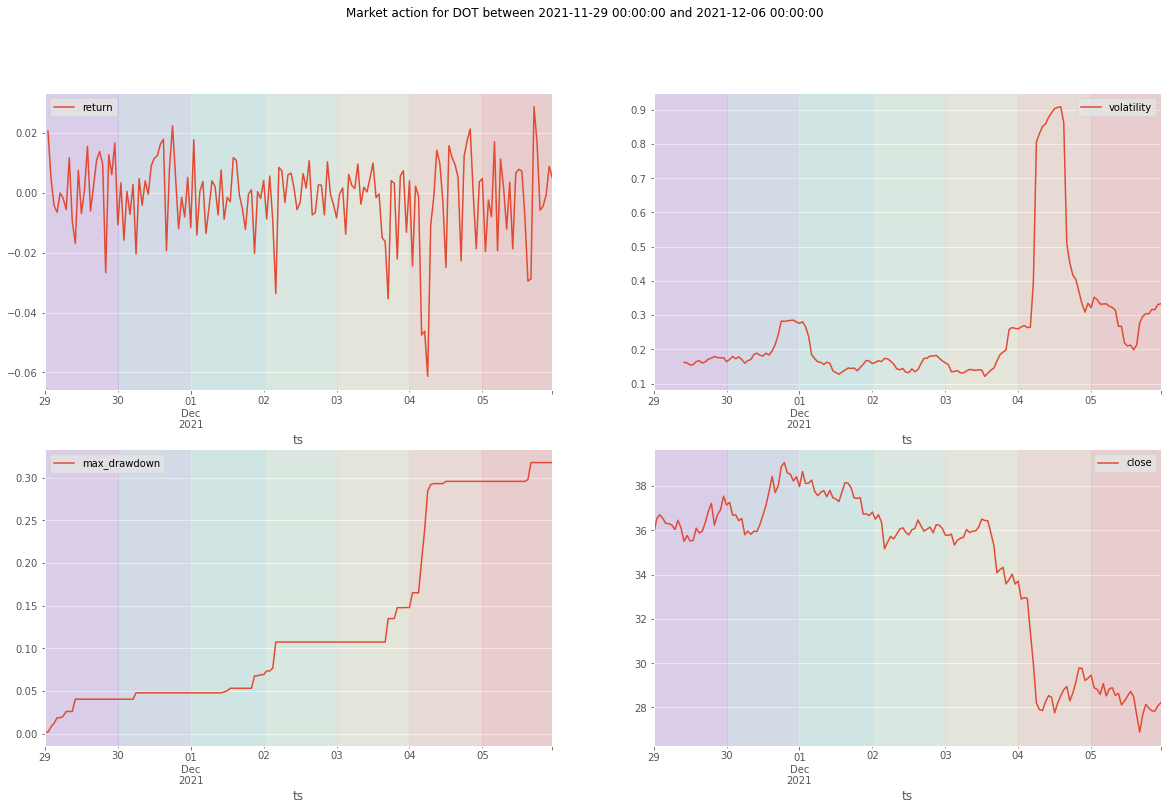

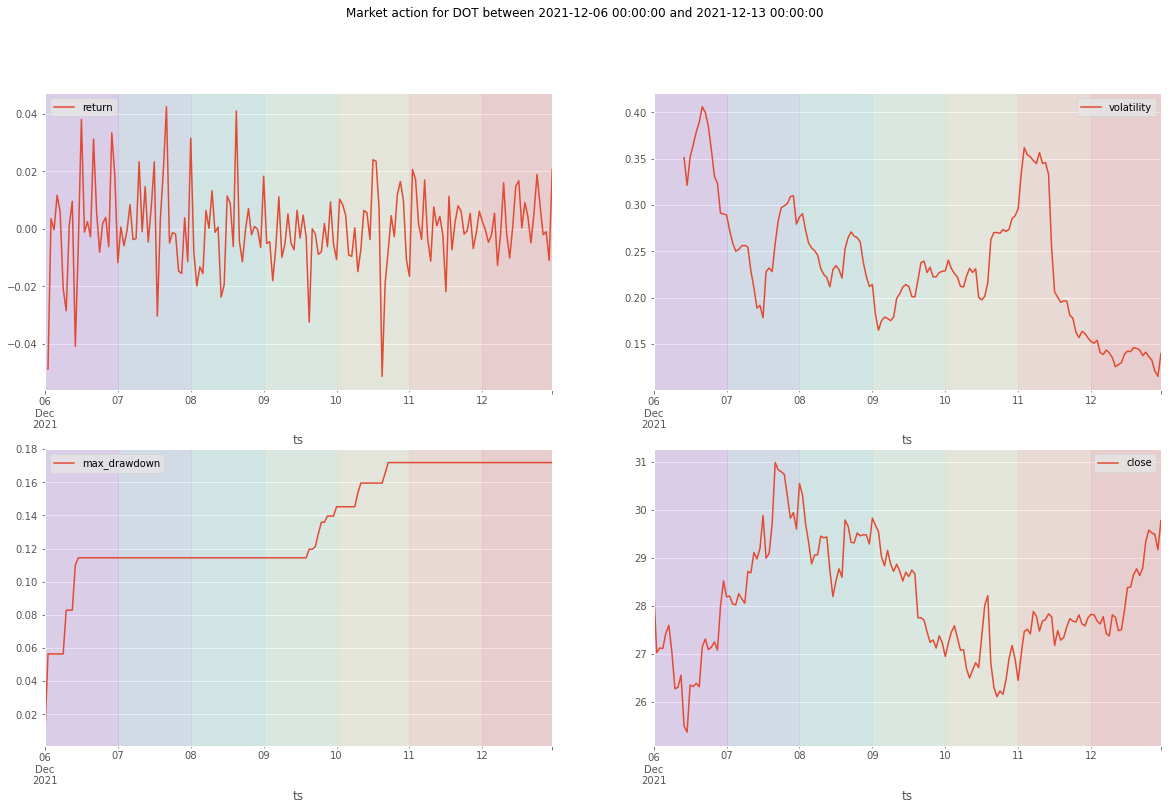

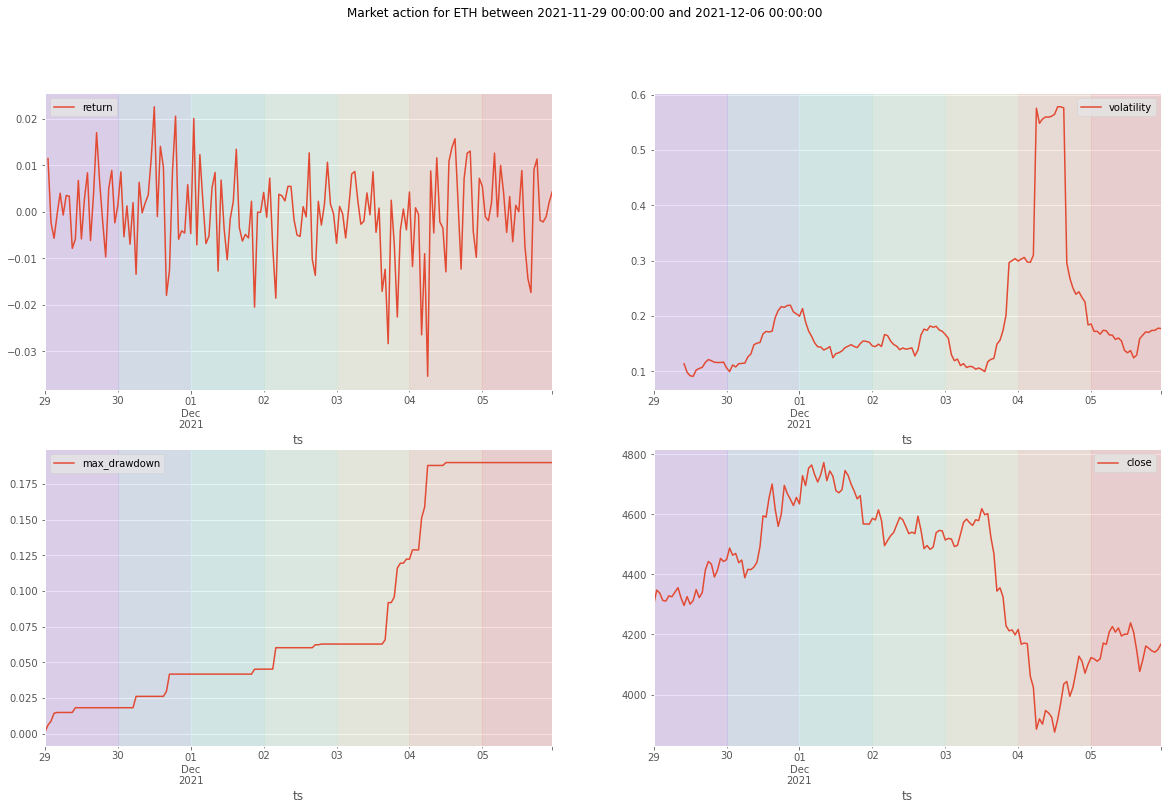

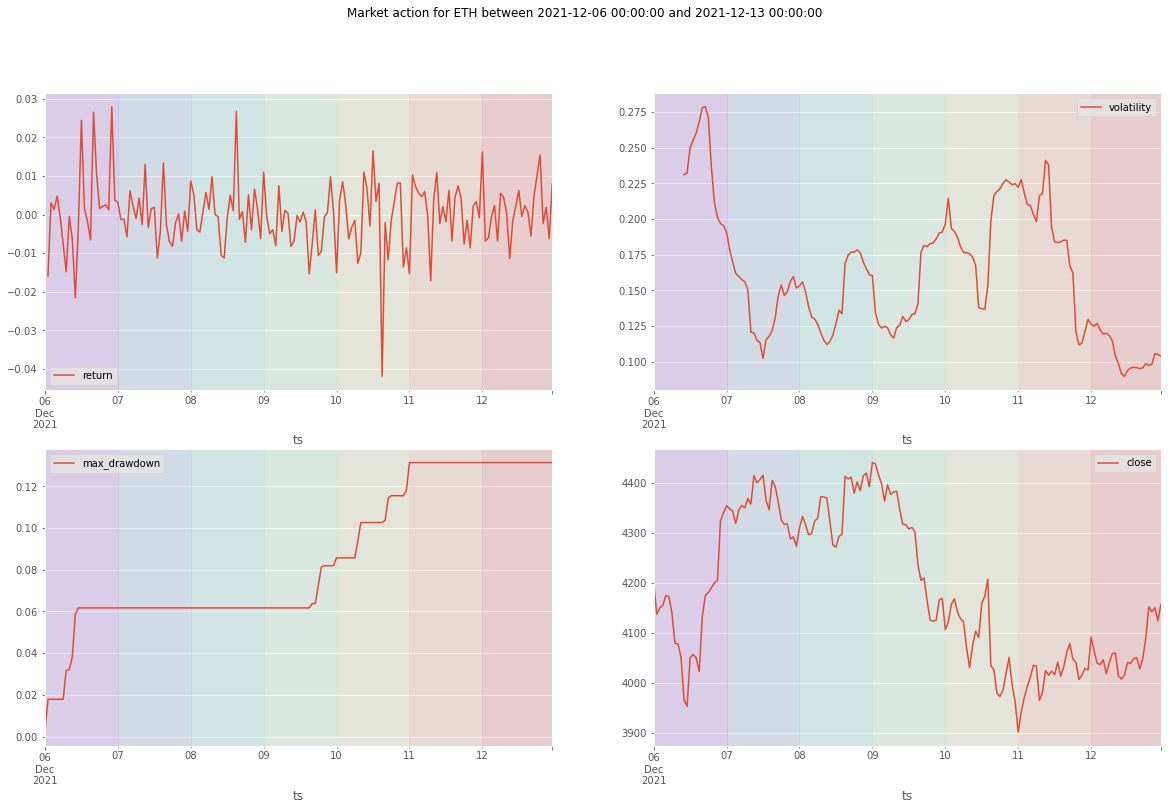

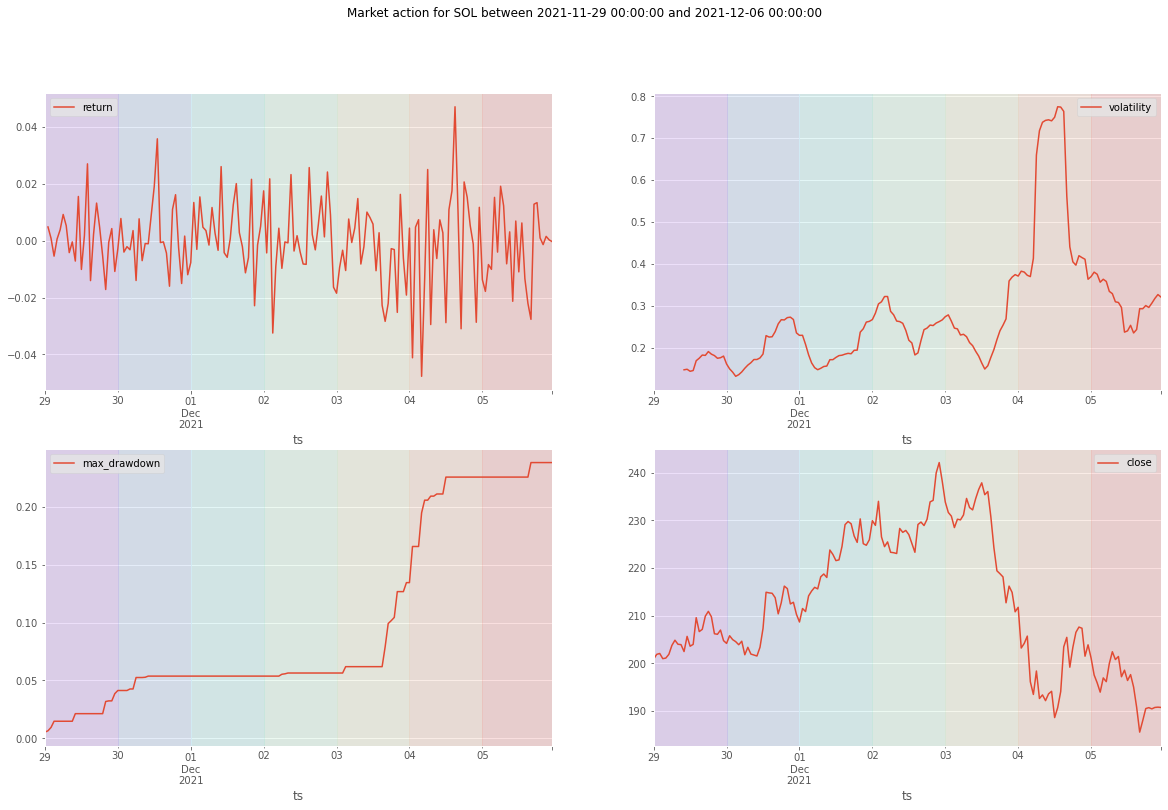

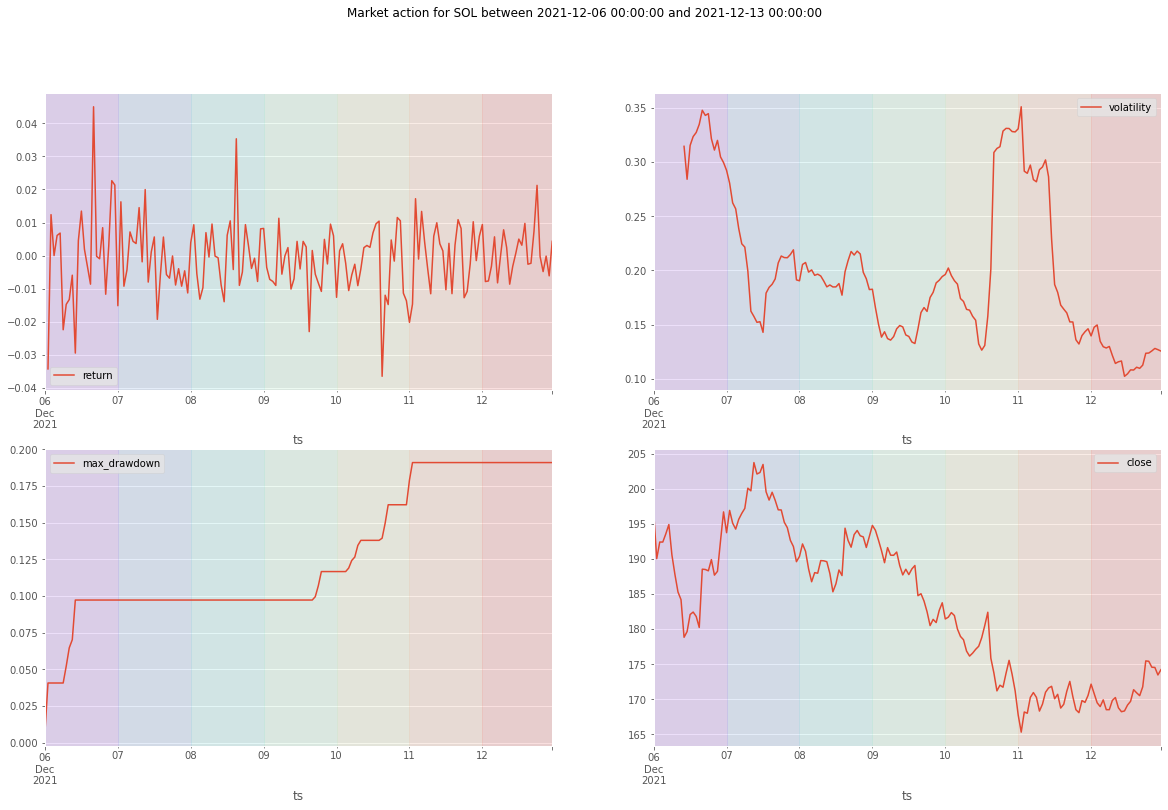

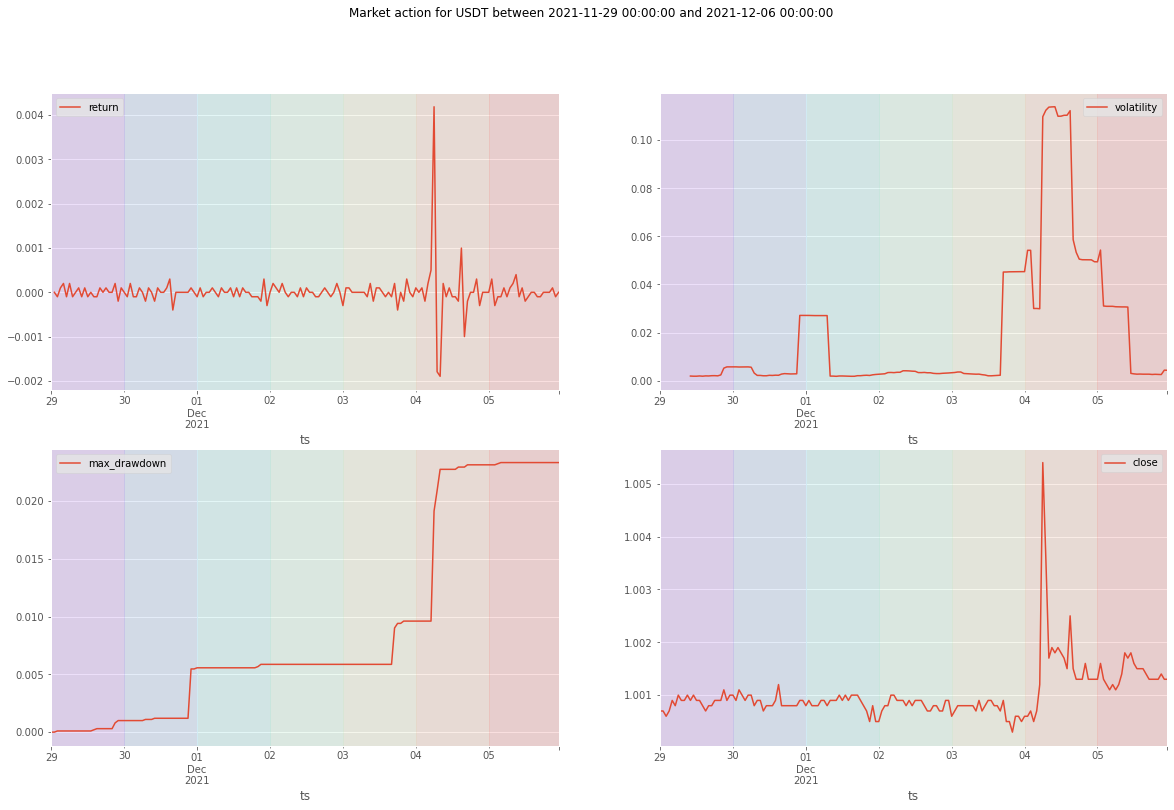

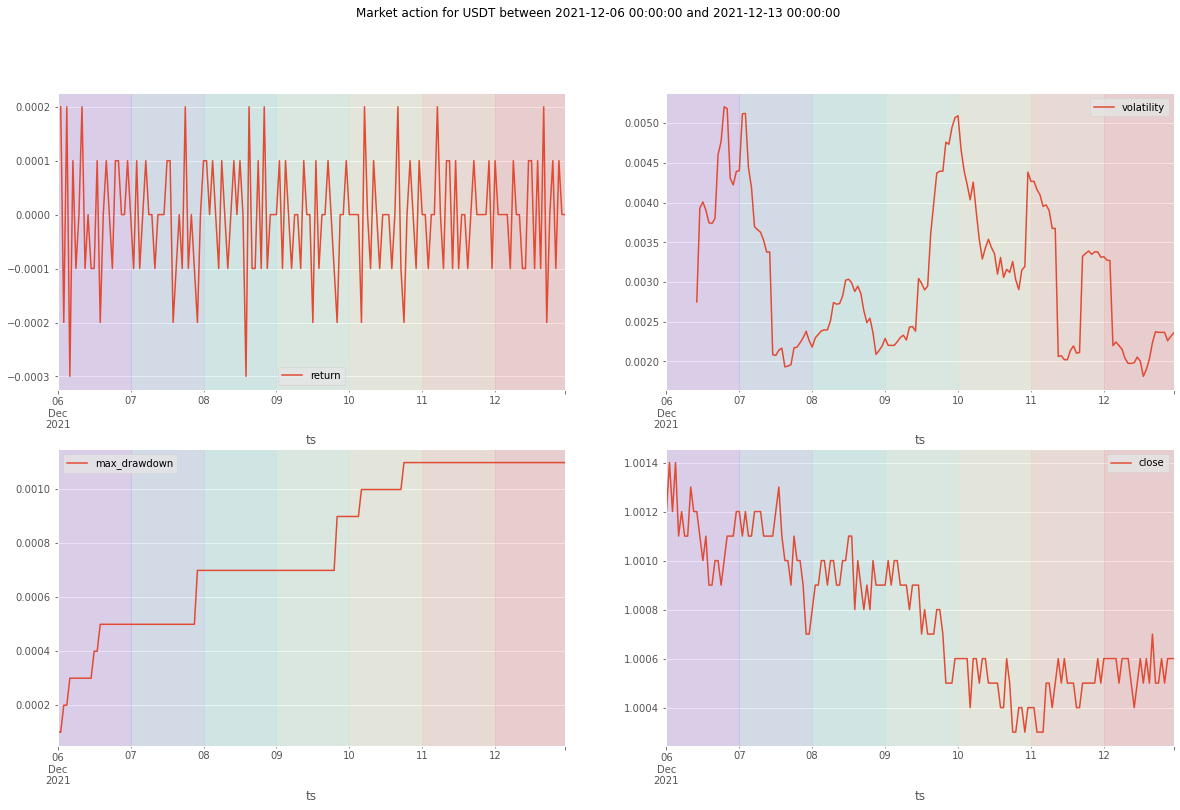

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]